Notebook que mostra procedimentos para a obtenção do Gráfico de Pareto a partir de um exemplo do livro **[Six Sigma: A Complete Step-by-Step Guide](https://www.sixsigmacouncil.org/wp-content/uploads/2018/08/Six-Sigma-A-Complete-Step-by-Step-Guide.pdf)**

<!-- TEASER_END -->

# Exemplos do livro Six Sigma: A Complete Step-by-Step Guide

![Six Sigma: A Complete Step-by-Step Guide](https://raw.githubusercontent.com/vstram/SixSigmaInR/master/book_cover-small.jpg)

## Conteúdo:
* [Exercício](#Exercício)
* [Procedimento](#Procedimento)
* [Solução Alternativa 1](#Solução-Alternativa-1)
* [Solução Alternativa 2](#Solução-Alternativa-2)
* [Referências](#Referências)

## Exercício

Exemplo (pág 71), refere-se a uma clinica médica com problemas de caixa devido à recusas de serviço médico. As razões para as recusas estão listadas no arquivo "ch05p071.txt".

Pede-se para plotar o Gráfico de Pareto para avaliar as principais causas deste problema.

### Procedimento

1. Carregar os dados do arquivo

In [56]:
# Obtém os dados do arquivo
data <-read.csv("ch05p071.txt", header=TRUE)
data

Type,Count
<chr>,<int>
Timely filling,13245
Medical Necessety,1423
Duplicate claim,18012
Clain lack information,4548
No Benefeciary found,10215
Service not covered,2154
Date of service issue,526


2. Prepara os dados carregados, ordenando-os de forma decrescente.

In [57]:
# Ordena os dados da coluna Count de forma decrescente
data <- data[order(-data$Count),];
data

,Type,Count
,<chr>,<int>
3,Duplicate claim,18012
1,Timely filling,13245
5,No Benefeciary found,10215
4,Clain lack information,4548
6,Service not covered,2154
2,Medical Necessety,1423
7,Date of service issue,526


3. Cria uma nova coluna 'Percent', resultado do calculo do valor de cada item da coluna 'Count' sobre o total desta coluna

In [58]:
# Cria uma nova coluna 'Percent' com o valor percentual de cada linha
data$Percent <- data$Count / sum(data$Count) * 100;
data

,Type,Count,Percent
,<chr>,<int>,<dbl>
3,Duplicate claim,18012,35.935598
1,Timely filling,13245,26.424995
5,No Benefeciary found,10215,20.379866
4,Clain lack information,4548,9.073679
6,Service not covered,2154,4.297428
2,Medical Necessety,1423,2.839016
7,Date of service issue,526,1.049418


4. Calcula a coluna que acumula os valores de percentagem, consistindo na coluna de Pareto

In [59]:
# Cria uma nova coluna 'CumPercent' com os valores acumulados da coluna 'Percent'
data$CumPercent <- cumsum(data$Percent);
data

,Type,Count,Percent,CumPercent
,<chr>,<int>,<dbl>,<dbl>
3,Duplicate claim,18012,35.935598,35.93560
1,Timely filling,13245,26.424995,62.36059
5,No Benefeciary found,10215,20.379866,82.74046
4,Clain lack information,4548,9.073679,91.81414
6,Service not covered,2154,4.297428,96.11157
2,Medical Necessety,1423,2.839016,98.95058
7,Date of service issue,526,1.049418,100.00000


5. Finalmente, plota o gráfico de Pareto

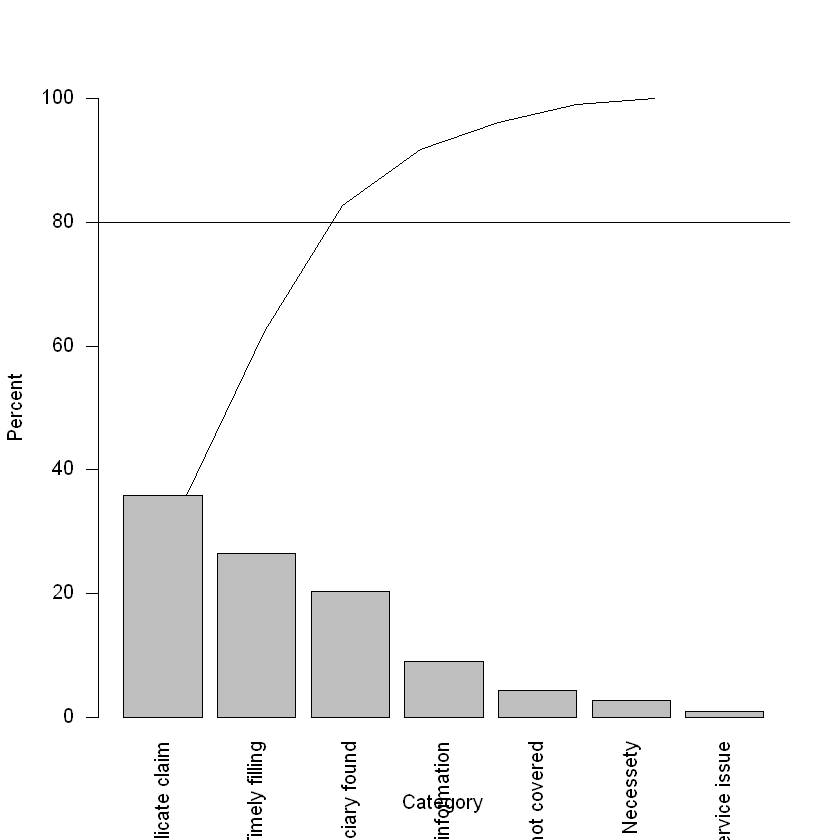

In [60]:
barplot(
    data$Percent, 
    ylab="Percent", 
    xlab="Category", 
    names.arg=data$Type, 
    las=2, 
    ylim=c(0, 100)
)

# Plota a curva de Pareto
lines(data$CumPercent)
abline(h=80)

## Solução Alternativa 1

A solução apresentada acima utiliza somente as bibliotecas padrão do `r`. Entretanto, como podem observar, trata-se de uma solução trabalhosa e cujo resultado final, embora possa ser aprimorado, não é satisfatório visualmente.

Desta forma, abaixo apresento uma outra solução, utilizando uma biblioteca para controle de qualidade chamada `qcc`.
Instale com o comando abaixo:

    install.packages("qcc")

In [61]:
# Importa a biblioteca
library("qcc", quietly = TRUE)

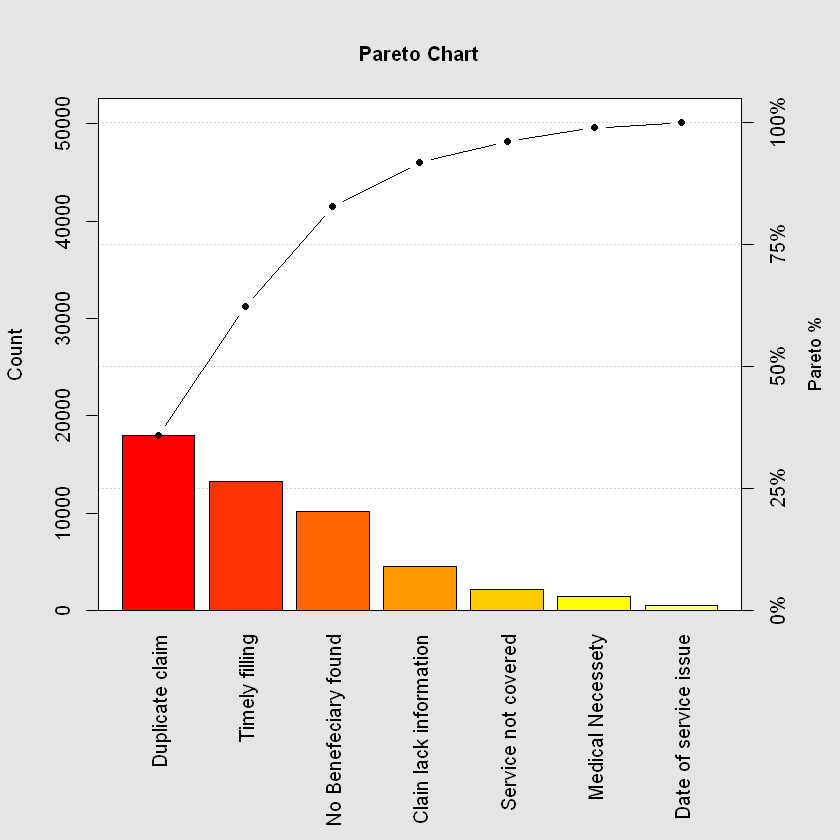

In [62]:
# define um vetor com os dados a serem plotados (coluna 'Count' do dataframe)
count.of.claims <- data$Count
# define um vetor com os nomes dos dados (coluna 'Type' do dataframe)
names(count.of.claims) <- data$Type

# cria uma tabela com os dadospara plotar o pareto (como fizemos manualmente acima)
# e ao mesmo tempo mostra o grafico (plot=TRUE)
pareto.data <- pareto.chart(
    count.of.claims,
    plot=TRUE,
    ylab="Count",
    col=heat.colors(length(count.of.claims)), # define esquema de cores para as barras
    ylab2 = "Pareto %", 
    main = "Pareto Chart", # Titulo do gráfico
    las=3, # labels dos eixos na vertical
)

Caso queira inspecionar os dados usado para plotar o grafico:

In [63]:
pareto.data

                        
Pareto chart analysis for count.of.claims
                            Frequency    Cum.Freq.   Percentage Cum.Percent.
  Duplicate claim        18012.000000 18012.000000    35.935598    35.935598
  Timely filling         13245.000000 31257.000000    26.424995    62.360593
  No Benefeciary found   10215.000000 41472.000000    20.379866    82.740458
  Clain lack information  4548.000000 46020.000000     9.073679    91.814137
  Service not covered     2154.000000 48174.000000     4.297428    96.111566
  Medical Necessety       1423.000000 49597.000000     2.839016    98.950582
  Date of service issue    526.000000 50123.000000     1.049418   100.000000

Observe que o gráfico é bem mais interessante, e a função `pareto.chart` calcula automaticamente as estatísticas que são plotadas no Pareto. Além disso, pode-se facilmente definir um esquema de cores para as barras, permitindo ainda mais entedimento ao gráfico

## Solução Alternativa 2

Aqui usamos outra bibliotecas do `R`: a de uso genérico `ggplot2` e uma outra biblioteca para controle de qualidade chamada `ggQC`

In [64]:
# Importa as bibliotecas necessárias
library(ggplot2)
library(ggQC) 

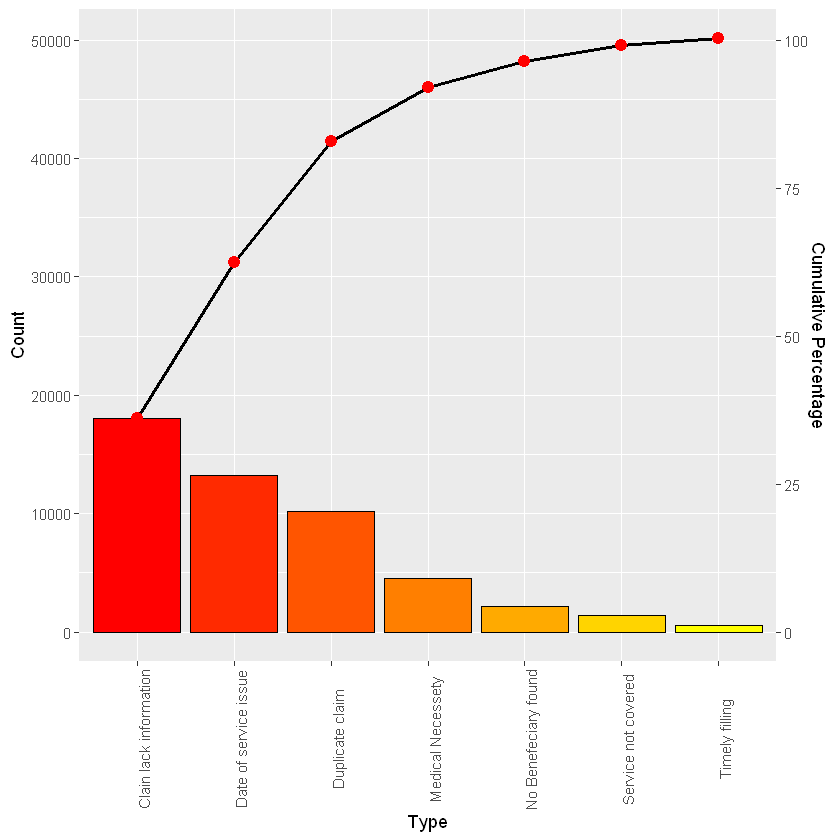

In [65]:
ggplot(
    data, 
    aes(x=Type, y=Count)
) + stat_pareto(
      point.color = "red",
      point.size = 3,
      line.color = "black",
      line.size = 1,
      bars.fill = c("red", "yellow"),
  ) + theme(
      axis.text.x = element_text(angle = 90) # rotaciona os labels do eixo x
  )

## Referências

Este notebook contém exemplos do livro **[Six Sigma: A Complete Step-by-Step Guide](https://www.sixsigmacouncil.org/wp-content/uploads/2018/08/Six-Sigma-A-Complete-Step-by-Step-Guide.pdf)** disponibilizado pelo [The Council for Six Sigma Certification](https://www.sixsigmacouncil.org/six-sigma-training-material/)

Bibliotecas utilizadas:
* [ggQC](https://www.rdocumentation.org/packages/ggQC/versions/0.0.31)
* [qcc](https://luca-scr.github.io/qcc/index.html)
* [ggplot2](https://ggplot2.tidyverse.org/)